In [ ]:
pip install diffusers

In [ ]:
import requests
import torch
from PIL import Image
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

from diffusers import StableDiffusionImg2ImgPipeline

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Create a directory for the Stanford Cars dataset
!mkdir /content/StanfordCars
%cd /content/StanfordCars

# Download the dataset from Kaggle
!kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder

# Unzip the downloaded dataset
!unzip -q stanford-car-dataset-by-classes-folder.zip

/content/StanfordCars
Dataset URL: https://www.kaggle.com/datasets/jutrera/stanford-car-dataset-by-classes-folder
License(s): other
100% 1.82G/1.83G [00:35<00:00, 87.7MB/s]
100% 1.83G/1.83G [00:35<00:00, 55.9MB/s]


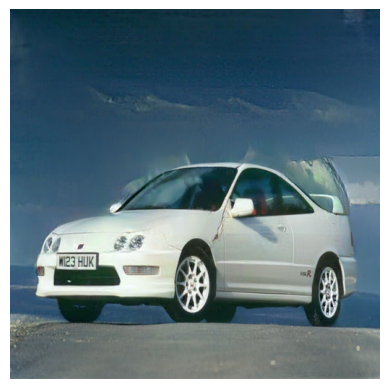

In [ ]:
image_path = '/content/enhanced_image_19.png'
init_image = Image.open(image_path)
init_image = init_image.resize((512, 512))
plt.imshow(init_image)
plt.axis('off')
plt.show()
promptC = "A white car"

In [ ]:
for s in [0.1, 0.25, 0.3, 0.5]:
  images = pipe(prompt=promptC, image=init_image, strength=s, guidance_scale=1).images
  images[0].save(f"/content/diffused_image_20_{s}_guid_1.png")

  0%|          | 0/5 [00:00<?, ?it/s]

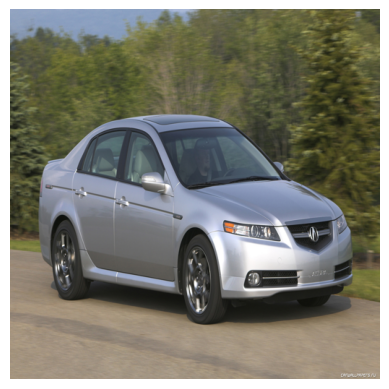

In [ ]:
image_path = '/content/StanfordCars/car_data/car_data/test/Acura TL Type-S 2008/00534.jpg'
init_image = Image.open(image_path)
init_image = init_image.resize((512, 512))
plt.imshow(init_image)
plt.axis('off')
plt.show()
promptA = "A fast car"
promtB = "A whale"

In [ ]:
strength_list = [0.1, 0.25, 0.5, 0.75, 0.9]
for s in strength_list:
  images = pipe(prompt=promptA, image=init_image, strength=s, guidance_scale=7.5).images
  images[0].save(f"/content/Strength/diffused_image_strength_{s}.png")

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

In [ ]:
type(images[0])

PIL.Image.Image

In [ ]:
for stren in [0.25, 0.5, 0.75, 1]:
  images = pipe(prompt=promtB, image=init_image, strength=stren, guidance_scale=7.5).images
  images[0].save(f"/content/Strength/unique_image_strength_{stren}_b.png")
  images[0].show()

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

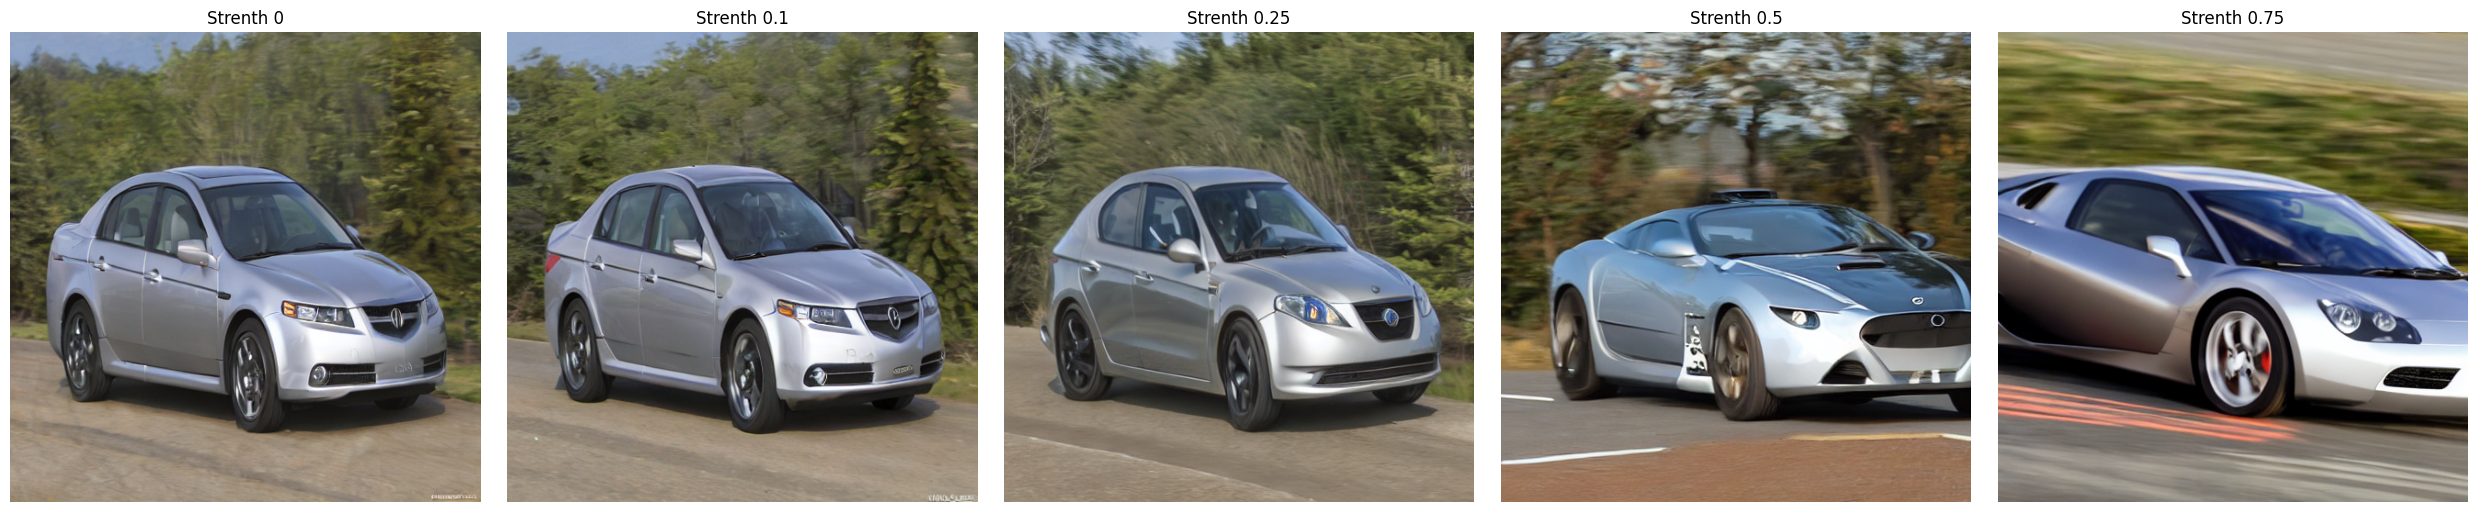

In [ ]:
# prompt: #Function that plot images stored at strength folder in a horizontal subplot
strength_list = [0, 0.1, 0.25, 0.5, 0.75, 0.9]

import matplotlib.pyplot as plt
import os

def plot_images_horizontal(folder_path, strength_list):
  """Plots images stored in a folder in a horizontal subplot."""

  image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
  image_files.sort()
  num_images = len(image_files)

  fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

  for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    image = image.resize((512, 512))
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Strenth {strength_list[i]}')

  plt.tight_layout()
  plt.show()

# Call the function to plot images from the "Stength" folder
plot_images_horizontal("/content/Strength", strength_list)


In [ ]:
guidance_list = [0.75, 1.5, 2.25, 3]

for g in guidance_list:
  images = pipe(prompt=promptA, image=init_image, strength=0.5, guidance_scale=g).images
  images[0].save(f"/content/Guidance/def_0_5_image_guidance_{g}_a.png")

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

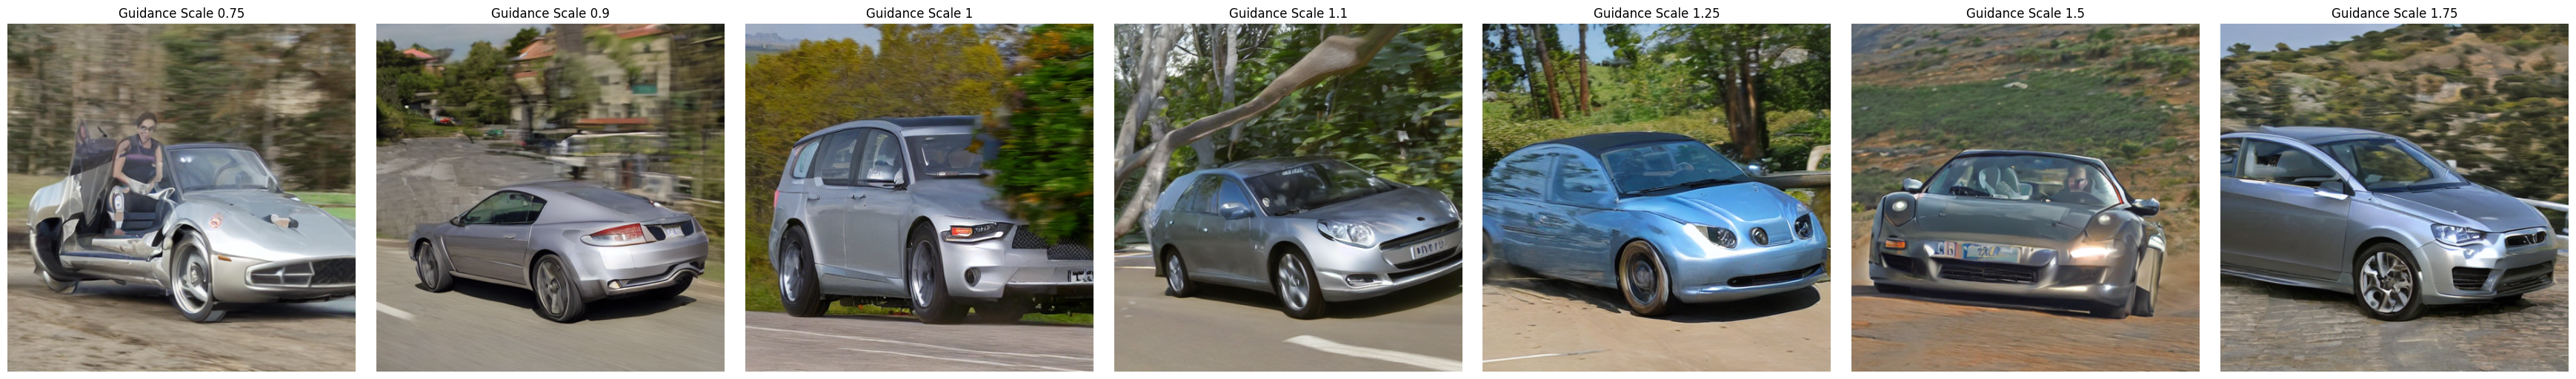

In [ ]:
import matplotlib.pyplot as plt
import os

def plot_images_horizontal(folder_path, strength_list):
  """Plots images stored in a folder in a horizontal subplot."""

  image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]
  image_files.sort()
  num_images = len(image_files)

  fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))

  for i, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    image = Image.open(image_path)
    image = image.resize((512, 512))
    axes[i].imshow(image)
    axes[i].axis('off')
    axes[i].set_title(f'Guidance Scale {strength_list[i]}')

  plt.tight_layout()
  plt.show()

# Call the function to plot images from the "Stength" folder
plot_images_horizontal("/content/Guidance", guidance_list)
